In [ ]:
!pip install ffmpeg
!pip install Wand

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=cb92e7e36f789905c49c35d1e93756f0268ebfa6427c8db1b4cf623afc1197c9
  Stored in directory: /home/jovyan/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 138 kB 20.0 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# import packages
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy
import statistics

In [ ]:
#drawingData = pd.read_csv('Neuro.csv')
drawingData = pd.read_csv('J csv/drawing_Jay1.csv')
#drawingData = pd.read_csv('J csv/drawing_Jay2.csv')
#drawingData = pd.read_csv('J csv/drawing_Jay3.csv')
#drawingData = pd.read_csv('J csv/drawing_Jay4.csv')
#drawingData = pd.read_csv('J csv/drawing_Jay5.csv')
#drawingData = pd.read_csv('P csv/drawing_P1.csv')
#drawingData = pd.read_csv('P csv/drawing_P2.csv')
#drawingData = pd.read_csv('P csv/drawing_P3.csv')
#drawingData = pd.read_csv('P csv/drawing_P4.csv')
#drawingData = pd.read_csv('P csv/drawing_P5.csv')
drawingData

,Coordinates,Timestamp,Velocity,force,azimuth
0,"267.0,86.0",582641.838,0.000000,0.333333,0.629872
1,"266.5,84.5",582641.847,175.682093,0.333333,0.629872
2,"266.0,83.5",582641.855,158.387200,0.183383,0.629872
3,"265.5,83.0",582641.863,134.164079,0.070921,0.629872
4,"264.5,82.5",582641.872,126.504783,0.139863,0.629872
...,...,...,...,...,...
599,"251.0,107.5",582646.783,5.419654,0.548540,0.636296
600,"249.0,111.0",582646.787,6.224660,0.473702,0.634480
601,"245.0,119.0",582646.795,8.001022,0.373169,0.631413
602,"240.5,129.0",582646.804,10.171144,0.190912,0.625706


Text(0.5, 1.0, 'Displacement (Fresh)')

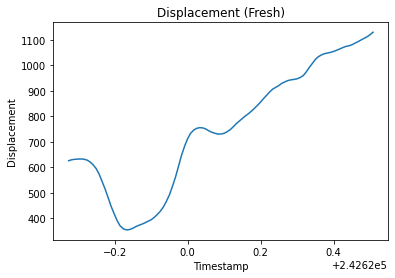

In [ ]:
# Displacement vs. Time -- FRESH
drawingData = pd.read_csv ('Neuro.csv')
displacement = []

for i in range(102):
    displacement.append(m.sqrt(float(drawingData['Coordinates'][i].split(",")[0])**2 + float(drawingData['Coordinates'][i].split(",")[1])**2))
plt.plot(drawingData['Timestamp'],displacement)
plt.xlabel('Timestamp')
plt.ylabel('Displacement')
plt.title('Displacement (Fresh)')

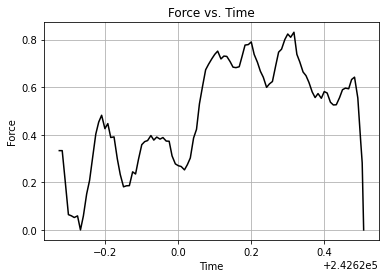

In [ ]:
# force vs. time (looking into pressure vs. time, but we're thinking that if we assume the area of contact is constant, 
# the pressure vs. time will look basically the same as force vs. time)

force_fig = plt.figure(num = 1, clear = True)
force_ax = force_fig.add_subplot(1, 1, 1)

force_ax.plot(drawingData['Timestamp'], drawingData['force'], 'k-')
force_ax.set(xlabel = 'Time', ylabel = 'Force', title = 'Force vs. Time')
force_ax.grid(True)
# this plot is meaningless without the reconstruction of the pen stroke

In [ ]:
# per segment descriptions of force, neglecting the first two data points and splitting the other 100 data points into 
# 10 segments (???)



102


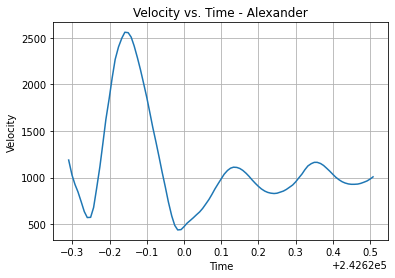

In [ ]:
# velocity vs. time

#drawingData = pd.read_csv ('Neuro.csv')
numRows = drawingData['Coordinates'].size
print(numRows)
vel = np.empty((0))
vel = []
for i in range(2,numRows):
    vel.append(drawingData['Velocity'][i])
plt.plot(drawingData.Timestamp[2:],vel)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs. Time - Alexander')
plt.grid()
plt.show()

507


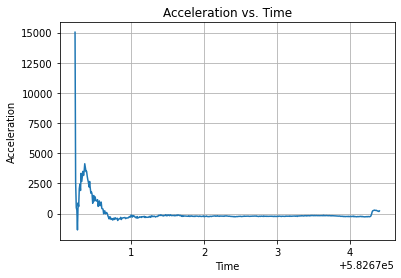

505


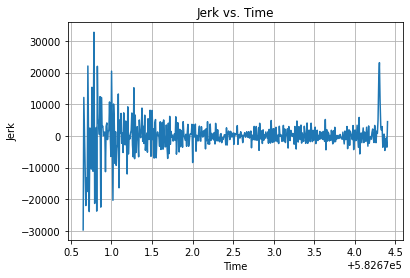

In [ ]:
 # acceleration vs. time
drawingData = pd.read_csv('J csv/drawing_Jay2.csv')
#drawingData = pd.read_csv('P csv/drawing_P2.csv')

numRows = drawingData['Velocity'].size
print(numRows)
accel = np.empty((0))
#accel = []
for i in range(2,numRows):
    accel = np.append(accel, (drawingData['Velocity'][i]-drawingData['Velocity'][i-1])/(drawingData['Timestamp'][i]-drawingData['Timestamp'][i-1]))
plt.plot(drawingData.Timestamp[2:],accel)
plt.ylabel('Acceleration')
plt.xlabel('Time')
plt.title('Acceleration vs. Time')
plt.grid(True)
plt.show()

numRows = accel.size
print(numRows)
jerk = np.empty((0))
for i in range(50,numRows):
    jerk = np.append(jerk, (accel[i]-accel[i-1])/(drawingData['Timestamp'][i]-drawingData['Timestamp'][i-1]))
plt.plot(drawingData['Timestamp'][52:],jerk) #start at 52 to avoid really large/small jerk values at the beginning
plt.ylabel('Jerk')
plt.xlabel('Time')
plt.title('Jerk vs. Time')
plt.grid()
plt.show()

In [ ]:
# statistical descriptions of jerk

print('mean jerk: ' + str(statistics.mean(jerk)))
print('stdev jerk: ' + str(statistics.stdev(jerk)))

mean jerk: 34.666381209639304
stdev jerk: 5435.223161970141


In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['Mean Velocity'])
df['Mean Velocity'].append(pd.Series([1, 2, 3, 4, 5]))

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
df

,Mean Velocity


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>